![dvd_image](dvd_image.jpg)

A DVD rental company needs your help! They want to figure out how many days a customer will rent a DVD for based on some features and has approached you for help. They want you to try out some regression models which will help predict the number of days a customer will rent a DVD for. The company wants a model which yeilds a MSE of 3 or less on a test set. The model you make will help the company become more efficient inventory planning.

The data they provided is in the csv file `rental_info.csv`. It has the following features:
- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import GradientBoostingRegressor

## Creating features and splitting into train and test dataset

In [9]:
df=pd.read_csv('rental_info.csv')
df['rental_length_days']=(pd.to_datetime(df['return_date'])-pd.to_datetime(df['rental_date'])).dt.days
df['deleted_scenes']=df.apply(lambda r:'Deleted Scenes' in r['special_features'],axis=1).astype(int)
df['behind_the_scenes']=df.apply(lambda r: 'Behind the Scenes' in r['special_features'],axis=1).astype(int)
X=df[['amount','release_year','rental_rate','length','replacement_cost','NC-17','PG','PG-13','R','amount_2','length_2','rental_rate_2','deleted_scenes','behind_the_scenes']]
y=df['rental_length_days']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=9)
df

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length_days,deleted_scenes,behind_the_scenes
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,3,0,1
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2,0,1
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,7,0,1
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2,0,1
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15856,2005-08-22 10:49:15+00:00,2005-08-29 09:52:15+00:00,6.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,48.8601,7744.0,24.9001,6,1,1
15857,2005-07-31 09:48:49+00:00,2005-08-04 10:53:49+00:00,4.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,24.9001,7744.0,24.9001,4,1,1
15858,2005-08-20 10:35:30+00:00,2005-08-29 13:03:30+00:00,8.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,80.8201,7744.0,24.9001,9,1,1
15859,2005-07-31 13:10:20+00:00,2005-08-08 14:07:20+00:00,7.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,63.8401,7744.0,24.9001,8,1,1


## Feature selection using Lasso Regression

## Getting alpha

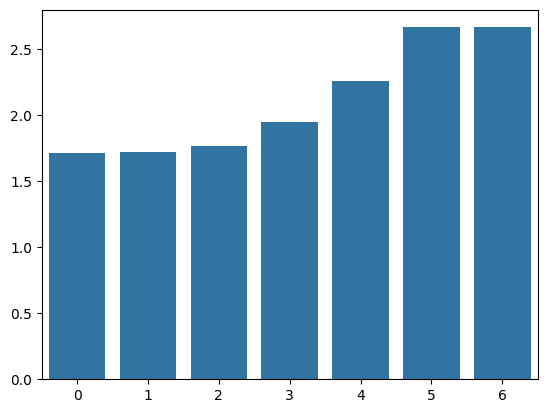

In [4]:
a=[.001,.01,.1,1,10,100,1000]
rmse=[]
for i in a:
    lasso=Lasso(random_state=9,alpha=i)
    lasso.fit(X_train,y_train)
    y_pred=lasso.predict(X_test)
    rmse.append(MSE(y_test,y_pred)**.5)
sns.barplot(x=range(7),y=rmse)
plt.show()

## Selecting Features

In [5]:
lasso=Lasso(random_state=9,alpha=.01)
lasso.fit(X_train,y_train)
X_train,X_test=X_train.loc[:,lasso.coef_>0],X_test.loc[:,lasso.coef_>0]

## SGB [Stochastic Gradient Boosting]

In [6]:
params={'alpha':[.01,.1,1,10,100],'learning_rate':[.01,.1,.5],'max_depth':[2,4,6,8],'subsample':[.4,.8]}
sgb=GradientBoostingRegressor()
sgb_cv=GridSearchCV(sgb,params,cv=5,scoring='neg_mean_squared_error',verbose=1,n_jobs=-1)
sgb_cv.fit(X_train,y_train)
best_model=sgb_cv.best_estimator_
(sgb_cv.best_params_,sgb_cv.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


({'alpha': 0.1, 'learning_rate': 0.5, 'max_depth': 8, 'subsample': 0.8},
 -2.3694359967313607)

In [7]:
y_pred=best_model.predict(X_test)
MSE(y_test,y_pred)

2.2737018678382355